In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


In [2]:
import warnings

warnings.filterwarnings('ignore')

# 1.Import dataset

In [4]:
df=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\excel_R_lms\random_forest_assignment\Fraud_check (1).csv" )

# 2.Exploratory data analysis

In [5]:
# view dimensions of dataset

df.shape

(600, 6)

In [6]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


our question is

Use random forest model to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [7]:
#so according to question i m adding a column 0r feature as fraud have class (risky, good) values based on Taxable.income
fraud = [] 
for value in df["Taxable.Income"]: 
    if value <= 30000: 
        fraud.append("risky") 
    else: 
        fraud.append("good") 
       
df["fraud"] = fraud    
 

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [9]:
df1=df.drop(['Taxable.Income','City.Population'], axis=1)

In [10]:
df1

,Undergrad,Marital.Status,Work.Experience,Urban,fraud
0,NO,Single,10,YES,good
1,YES,Divorced,18,YES,good
2,NO,Married,30,YES,good
3,YES,Single,15,YES,good
4,NO,Married,28,NO,good
...,...,...,...,...,...
595,YES,Divorced,7,YES,good
596,YES,Divorced,2,YES,good
597,NO,Divorced,0,YES,good
598,YES,Married,17,NO,good


# View summary of dataset

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Work.Experience    600 non-null int64
Urban              600 non-null object
fraud              600 non-null object
dtypes: int64(1), object(4)
memory usage: 23.6+ KB


In [12]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban', 'fraud'], dtype='object')

In [13]:
col_names=['Undergrad', 'Marital.Status',  'Urban', 'fraud']

for col in col_names:
    
    print(df1[col].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
good     476
risky    124
Name: fraud, dtype: int64


# Missing values in variables

In [14]:
# check missing values in variables

df1.isnull().sum()

Undergrad          0
Marital.Status     0
Work.Experience    0
Urban              0
fraud              0
dtype: int64

# 3. Declare feature vector and target variable

In [15]:
x = df1.drop(['fraud'], axis=1)

y = df1['fraud']

In [16]:
#x
#y

# 4.feature engineering

In [17]:
# display categorical variables

categorical = [col for col in x.columns if x[col].dtypes == 'O']

categorical

['Undergrad', 'Marital.Status', 'Urban']

In [18]:
# display numerical variables

numerical = [col for col in x.columns if x[col].dtypes != 'O']

numerical

['Work.Experience']

# Encode categorical variables

Now, I will encode the categorical variable

We can see that all the variables are ordinal categorical data type.

In [20]:
# import category encoders

import category_encoders as ce

In [21]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])


x1 = encoder.fit_transform(x)

In [22]:
x1

,Undergrad,Marital.Status,Work.Experience,Urban
0,1,1,10,1
1,2,2,18,1
2,1,3,30,1
3,2,1,15,1
4,1,3,28,2
...,...,...,...,...
595,2,2,7,1
596,2,2,2,1
597,1,2,0,1
598,2,3,17,2


# 5. Feature Scaling

We now have x1 data set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling

In [24]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x1= scaler.fit_transform(x1)

In [25]:
x2 = pd.DataFrame(x1, columns=['Undergrad','Marital.Status','Work.Experience','Urban'])

In [26]:
x2

,Undergrad,Marital.Status,Work.Experience,Urban
0,-1.0,-0.5,-0.3125,0.0
1,0.0,0.0,0.1875,0.0
2,-1.0,0.5,0.9375,0.0
3,0.0,-0.5,0.0000,0.0
4,-1.0,0.5,0.8125,1.0
...,...,...,...,...
595,0.0,0.0,-0.5000,0.0
596,0.0,0.0,-0.8125,0.0
597,-1.0,0.0,-0.9375,0.0
598,0.0,0.5,0.1250,1.0


# 6. Split data into separate training and test set

In [27]:
# split X2 and y into training and testing sets

from sklearn.model_selection import train_test_split

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.33, random_state = 42)

In [28]:
#x2_train
#x2_test
#y_test
#y_train

# 7. Random Forest Classifier model with default parameters

In [29]:
from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(x2_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(x2_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6818


Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

# 8. Random Forest Classifier model with parameter n_estimators=200

In [31]:
# instantiate the classifier with n_estimators = 200

rfc_200 = RandomForestClassifier(n_estimators=200, random_state=0)



# fit the model to the training set

rfc_200.fit(x2_train, y_train)



# Predict on the test set results

y_pred_200 = rfc_200.predict(x2_test)

# Check accuracy score 

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))


Model accuracy score with 200 decision-trees : 0.6869


The model accuracy score with 10 decision-trees is 0.6818 but the same with 200 decision-trees is 0.6869. So, as expected accuracy increases littlebit with number of decision-trees in the model.

# 9. Find important features with Random Forest model

In [32]:
# create the classifier with n_estimators = 200

clf = RandomForestClassifier(n_estimators=200, random_state=0)



# fit the model to the training set

clf.fit(x2_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Now, I will use the feature importance variable to see feature importance scores

In [33]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=x2_train.columns).sort_values(ascending=False)

feature_scores

Work.Experience    0.771036
Marital.Status     0.108134
Urban              0.063995
Undergrad          0.056834
dtype: float64

# 10. Visualize feature scores of the features

Now, I will visualize the feature scores with matplotlib and seaborn.

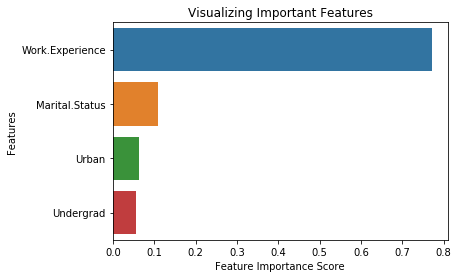

In [34]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# 11. Build Random Forest model on selected features

Now, I will drop the least important features Undergrad from the model, rebuild the model and check its effect on accuracy.

In [35]:
# declare feature vector and target variable

x_f = x2.drop(['Undergrad'], axis=1)

y_f= df1['fraud']

In [36]:
#x_f
#y_f

# Split data into separate training and test set

In [37]:
# split X_f and y_f into training and testing sets

from sklearn.model_selection import train_test_split

x_f_train, x_f_test, y_f_train, y_f_test = train_test_split(x_f, y_f, test_size = 0.33, random_state = 42)

In [38]:
#x_f_train
#x_f_test
#y_f_test
#y_f_train

In [39]:
# instantiate the classifier with n_estimators = 200

clf = RandomForestClassifier( n_estimators=200,random_state=0)



# fit the model to the training set

clf.fit(x_f_train, y_f_train)


# Predict on the test set results

y_f_pred = clf.predict(x_f_test)



# Check accuracy score 

print('Model accuracy score with US and Urban variables removed : {0:0.4f}'. format(accuracy_score(y_f_test, y_f_pred)))


Model accuracy score with US and Urban variables removed : 0.7121


so here we can conclude that by droping any features our accuracy has been increased little bit .

# 12. Confusion matrix

In [40]:
##Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_f_test, y_f_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[135  22]
 [ 35   6]]


# 13. Classification Report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_f_test, y_f_pred))

              precision    recall  f1-score   support

        good       0.79      0.86      0.83       157
       risky       0.21      0.15      0.17        41

    accuracy                           0.71       198
   macro avg       0.50      0.50      0.50       198
weighted avg       0.67      0.71      0.69       198

